<a href="https://colab.research.google.com/github/12singhshiva/1RF21IS051/blob/Decision_tree/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# pandas allow you to take in data in a certain structure
data = pd.read_csv("winequality-red.csv")
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(array([ 10.,   0.,   0.,   0.,  53.,   0.,   0.,   0., 681.,   0.,   0.,
          0., 638.,   0.,   0.,   0., 199.,   0.,   0.,  18.]),
 array([3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
        5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ]),
 <BarContainer object of 20 artists>)

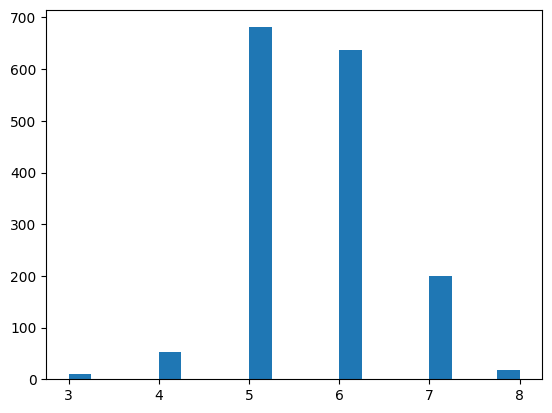

In [3]:
import matplotlib.pyplot as plt
target_column = data["quality"]
plt.hist(target_column , bins=20)

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
label_quality = LabelEncoder()

# Transform the 'quality' column
data['quality'] = label_quality.fit_transform(data['quality'])

# Map the quality values to 1 (good) and 0 (bad)
data['quality'] =data['quality'].apply(lambda x: 1 if x >= 5 else 0)

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
def preprocess_data(data, target_column):
    X = data.drop(columns=[target_column])# takes in all the columns except the target column
    y = data[target_column]# is the target column

    # Handling Missing Values
    numerical_cols = X.select_dtypes(include=['number']).columns # code identifies numerical and categorical columns in the feature set X.
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_transformer = SimpleImputer(strategy='mean')  # numerical columns, missing values are imputed with the mean, while for categorical columns, missing values are imputed with the most frequent value.
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Preprocessing training and testing data
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)

    return X_train_preprocessed, X_test_preprocessed,y_train,y_test

In [12]:
preprocess_data(data, target_column="quality")

(array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
        [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
        [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
        ...,
        [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
        [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
        [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]]),
 array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
        [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
        [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
        ...,
        [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
        [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
        [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]]),
 493     0
 354     0
 342     0
 834     0
 705     0
        ..
 1130    0
 1294    0
 860     0
 1459    0
 1126    0
 Name: quality, Length: 1279, dtype: int64,
 803     0
 124     0
 350     0
 682     0
 1326    0
        ..
 1259    0
 1295   

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

def preprocess_data(df, target_column="quality"):
    X = data.drop(columns=[target_column])
    y = data[target_column].apply(lambda x: 1 if x > 5 else 0)  # Convert quality to binary
    return train_test_split(X, y, test_size=0.2, random_state=0)

def build_decision_tree(X_train, y_train, max_depth=None):
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(X_train, y_train)
    return classifier

def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

    return accuracy, report, confusion_mat

# Assuming df contains your dataset
X_train, X_test, y_train, y_test = preprocess_data(data)
classifier = build_decision_tree(X_train, y_train)
accuracy, report, confusion_mat = evaluate_model(classifier, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       320

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Confusion Matrix:
 [[320]]


In [19]:
def visualize_decision_tree(classifier, feature_names):
    plt.figure(figsize=(20,10))
    plot_tree(classifier, filled=True, feature_names=feature_names, class_names=['0', '1'])
    plt.show()

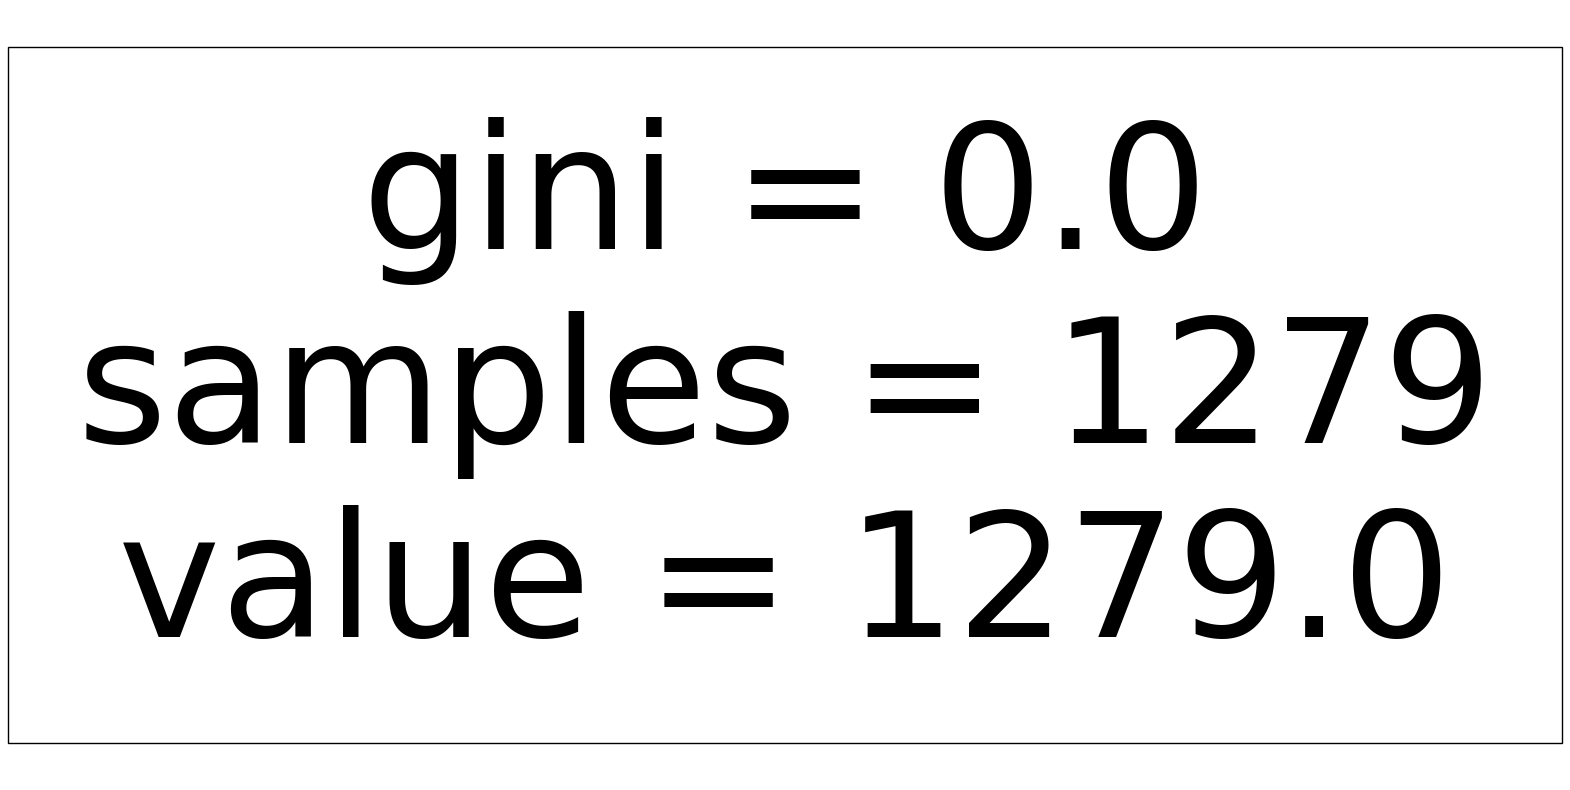

In [20]:
visualize_decision_tree(classifier, X_train.columns)